## Importing the required libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Pre Processing the Titanic Dataset

In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### checking and filling null values

<AxesSubplot:>

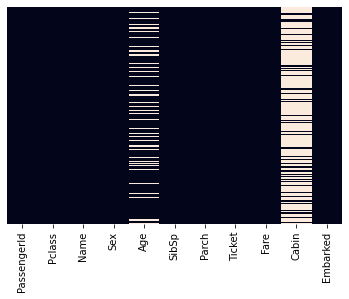

In [12]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

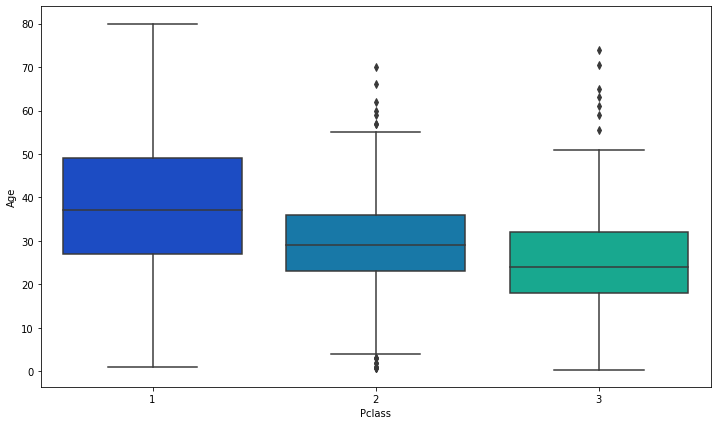

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

### We can see that Cabin has a lot of missing values and can be removed and Age is related to the Pclass column as wealthier passengers are tend to be from the same age group and same for others

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [15]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [16]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### Converting the categorical values to numerical and dropping Name and Ticekt as they don't have any relavance to survival

In [29]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Splitting the dataset into test and train with an 80:20 split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size=0.20,random_state=101)

In [31]:
X_train.shape

(711, 9)

### Task 3: Logistic Regression using sklearn on Titanic dataset

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Users\ratha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Checking the coeficients that our model generated, since we took nine input labels we have nine weights and a bias

In [35]:
print(logmodel.coef_)

print(logmodel.intercept_)

[[ 6.15412996e-04 -3.40279060e-01  6.06010417e-05 -1.78013371e-01
  -3.47270479e-01  9.72926749e-03 -2.81398225e+00  2.64328996e-01
   8.25147835e-02]]
[1.46781349]


### precision, recall, and F-measure scores on train and test set

In [33]:
print(classification_report(y_test,predictions))
print("Accuracy on test:",metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       107
           1       0.85      0.63      0.73        71

    accuracy                           0.81       178
   macro avg       0.82      0.78      0.79       178
weighted avg       0.81      0.81      0.80       178

Accuracy on test: 0.8089887640449438


In [34]:
predictions_train = logmodel.predict(X_train)
print(classification_report(y_train,predictions_train))
print("Accuracy on train:",metrics.accuracy_score(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       442
           1       0.76      0.68      0.72       269

    accuracy                           0.80       711
   macro avg       0.79      0.78      0.78       711
weighted avg       0.80      0.80      0.80       711

Accuracy on train: 0.7988748241912799


### The model gives almost similar results for train and test dataset